# Bitcoin Currency Prediction

**Introduction**

Welcome to my Jupyter Notebook project on predicting Bitcoin prices! In this project, I explore how data science techniques can be leveraged to forecast the price movements of Bitcoin, the world's leading cryptocurrency. With its high volatility, understanding and predicting Bitcoin prices is not only fascinating but also crucial for traders and investors seeking to make informed decisions in the rapidly evolving cryptocurrency market.

Through this analysis, I aim to demonstrate how historical price data and machine learning algorithms can be utilized to build a predictive model. By leveraging Python libraries and techniques, I'll showcase the process of data preprocessing, feature engineering, model training, evaluation, and interpretation of results.

Join me on this journey as we delve into the intricacies of Bitcoin price prediction and explore the insights gained from this data-driven approach. Let's uncover the patterns and trends that drive Bitcoin prices and see how accurately we can forecast its future movements.

### Step 1: Import Libraries

In [5]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Explanation:
- Import the pandas library to work with DataFrames and other necessary libraries for plotting and time series analysis.

### Step 2: Load and Prepare the Data

In [6]:
data = pd.read_csv('coin_Bitcoin.csv')
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


Explanation:
- Load the Bitcoin dataset from a CSV file.
- Display the first few rows of the dataset and the data types of each column to understand the structure of the data.

### Step 3: Data Preprocessing

In [7]:
# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set date as index
data.set_index('Date', inplace=True)

# Check for missing values
data.isnull().sum()

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

Explanation:
- Convert Date to DateTime: Converts the 'Date' column to datetime format to facilitate time series operations.
- Set Index: Sets the 'Date' column as the index of the DataFrame for easier time series manipulation.
- Handle Missing Values: Uses forward fill (ffill) to fill any missing values in the dataset, ensuring continuity in time series data.

### Step 4: Time Series Visualization vs Distribution Plot

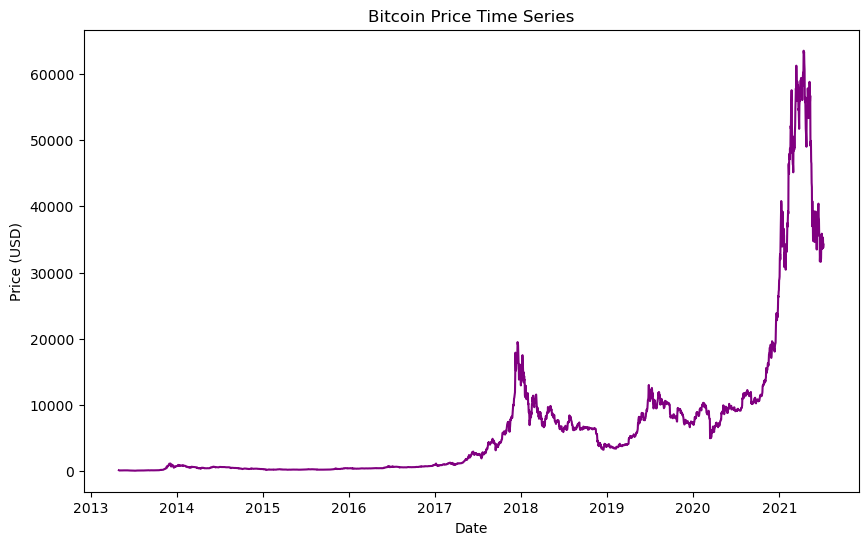

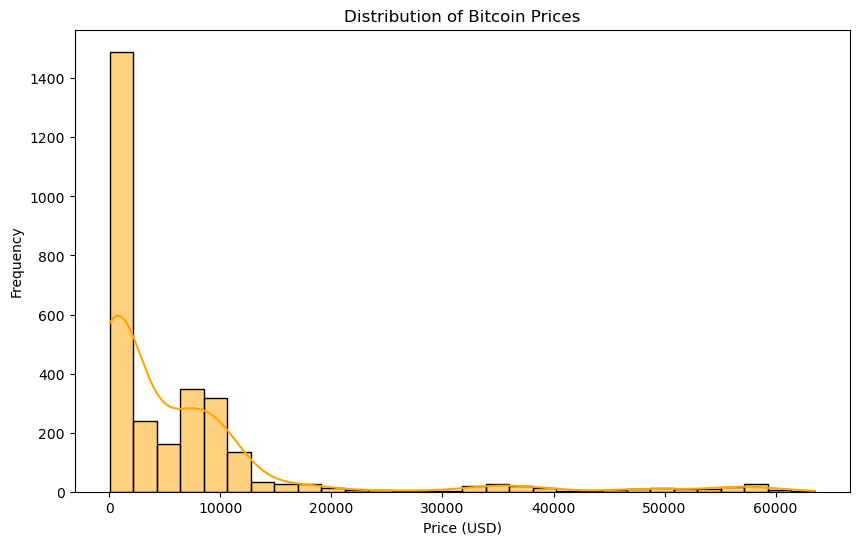

In [8]:
# Plot the time series of Bitcoin prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='purple')
plt.title('Bitcoin Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

# Plot the distribution of Bitcoin prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='orange')
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

Explanation:
- Time Series Plot: Plots the time series of Bitcoin prices using matplotlib.
- Visualization: Displays the Bitcoin price over time, with dates on the x-axis and price in USD on the y-axis.
.
- Distribution Plot: Uses seaborn to plot the distribution of Bitcoin prices.
- Visualization: Shows the frequency of Bitcoin prices across different price ranges, with an overlay of a kernel density estimate (kde) for smoother estimation.

### Step 5: Feature Analysis

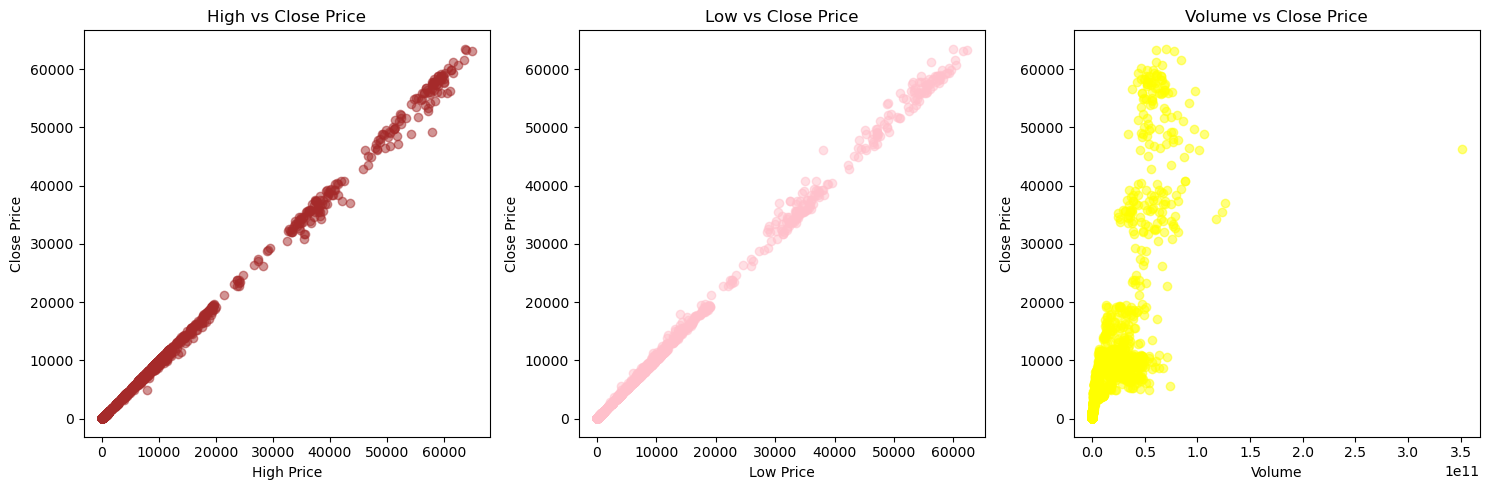

In [9]:
# Scatter plots of features vs. close price
plt.figure(figsize=(15, 5))

# High vs. Close
plt.subplot(1, 3, 1)
plt.scatter(data['High'], data['Close'], alpha=0.5, color='brown')
plt.title('High vs Close Price')
plt.xlabel('High Price')
plt.ylabel('Close Price')

# Low vs. Close
plt.subplot(1, 3, 2)
plt.scatter(data['Low'], data['Close'], alpha=0.5, color='pink')
plt.title('Low vs Close Price')
plt.xlabel('Low Price')
plt.ylabel('Close Price')

# Volume vs. Close
plt.subplot(1, 3, 3)
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='yellow')
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

Explanation:
- Feature Analysis: Uses scatter plots to analyze relationships between different features (High, Low, Volume) and the target variable (Close price).
- Visualization: Displays how each feature correlates with Bitcoin's closing price, helping identify potential predictive features.

### Step 6: Feature Engineering

In [10]:
# Create features for the model
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# Example of creating lag features
data['Price_Lag1'] = data['Close'].shift(1)
data['Price_Lag2'] = data['Close'].shift(2)

# Drop rows with NaN values
data.dropna(inplace=True)

Explanation:
- Create Features: Adds new features to the dataset such as Day, Month, Year extracted from the date index, and lagged features (Price_Lag1, Price_Lag2) of the closing price (Close).
- Data Preparation: Removes rows with missing values (NaN) resulting from lagging operations to prepare for model training.

### Step 7: Split the Data

In [11]:
# Define features and target variable
X = data[['Day', 'Month', 'Year', 'High', 'Low', 'Volume', 'Price_Lag1', 'Price_Lag2']]
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explanation:
- Define Features and Target: Separates the dataset into features (X) and target variable (y) arrays.
- Split Data: Splits the data into training (X_train, y_train) and testing (X_test, y_test) sets using train_test_split from sklearn.model_selection.

### Step 8: Standardize the Data

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Explanation:
- Standardization: Uses StandardScaler from sklearn.preprocessing to standardize (normalize) the features (X_train, X_test). This ensures all features are on the same scale, which is often beneficial for many machine learning algorithms.

### Step 9: Train the Model

In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Explanation:
- Model Training: Initializes and trains a linear regression model (LinearRegression) using the training data (X_train_scaled, y_train).

### Step 10: Make Predictions

In [18]:
y_pred = model.predict(X_test_scaled)
y_pred

array([  386.26948451,  8117.80464015,   237.10292301,  3533.70544298,
         579.40932807,   589.35525695,  7256.66580368, 32939.94306419,
        8779.94215115,   620.65961193,  2255.262042  , 37495.86909314,
        4094.43726906,  5647.16979591,  4388.57963481,   100.75906807,
          91.80268357,   401.52442178,   897.1644032 ,   223.51557814,
         238.18800645,  3854.77448145, 10212.08202619,  9719.01897285,
         884.8295978 , 17017.48384273, 54804.97506837,   272.49171439,
        6809.32843957,  1035.99957927,   101.27473765,   896.95226698,
        7192.32803779,  6362.83539847,  7005.05411418,   501.77076302,
         493.71300944,  4100.6097029 , 43865.22709328,   106.50799065,
        1744.65055933,  4131.90953441,  8759.10276359,   169.99628604,
         394.96967807,   449.19509382,  7066.44907746,  9334.89493682,
        8797.9180209 , 10872.73963641,  9720.35772575,  8516.26109093,
         440.36128291,   323.70379579,  7625.15693113,   451.77618577,
      

Explanation:
- Prediction: Uses the trained model to make predictions (y_pred) on the test data (X_test_scaled).

### Step 11: Evaluate the Model

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 48080.03893478371
R-squared: 0.9996401887846873


Explanation:
- Model Evaluation: Computes and prints the Mean Squared Error (MSE) and R-squared (coefficient of determination) scores to evaluate the model's performance on the test data (y_test, y_pred).

### Step 12: Visualize the Results

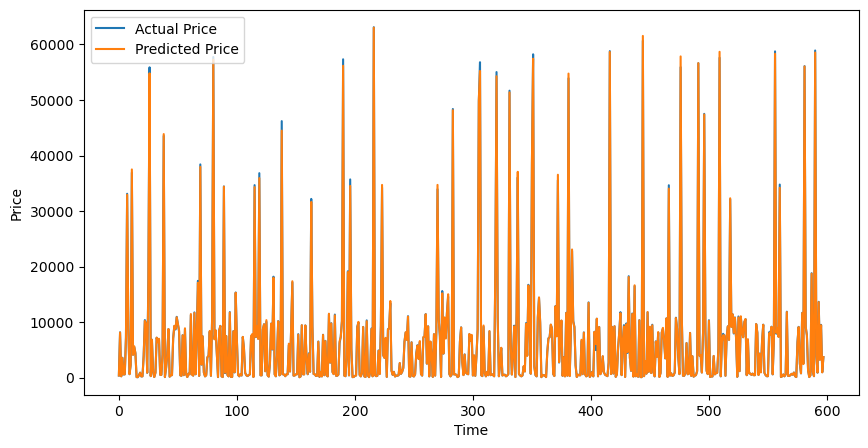

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Explanation:
- Results Visualization: Plots the actual Bitcoin prices (y_test.values) against the predicted prices (y_pred), using matplotlib.
- Visualization: Shows how well the model's predictions align with actual prices over time, aiding in understanding model performance visually.